Assignment Points

- Using MNIST, CFAR-10 datasets
- Implement ResNet 50, VGG16
- Pretrained ResNet 50, VGG16


# 1. MNIST Dataset

### 1.1. Imports


In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [15]:
import matplotlib.pyplot as plt
import numpy as np

### 1.2. Loading dataset


In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [18]:
len(x_train)

60000

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 1.3. Visualize data samples


In [20]:
# Pick 10 Random samples to visualize
random_indices = np.random.randint(0, len(x_train), size=30)

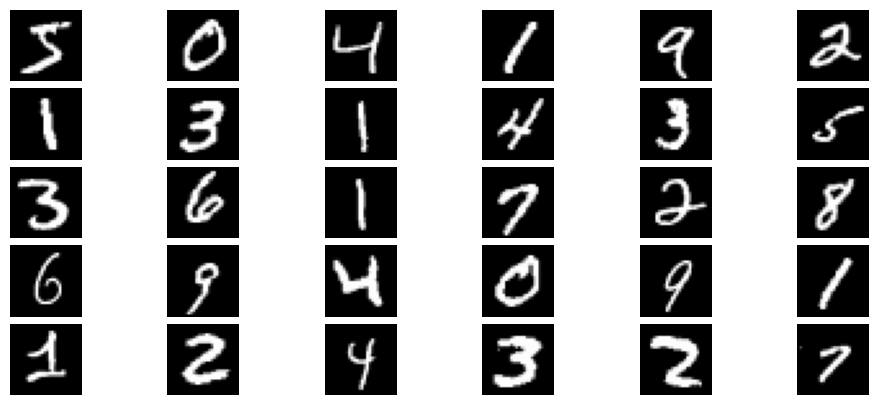

In [21]:
num_rows = 5
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5))

for i in range(num_rows):
    for j in range(num_cols):
        axes[i, j].imshow(x_train[i * num_cols + j], cmap='gray')
        axes[i, j].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

### 1.4. Preprocessing datasets

#### 1.4.1 Normalization

In [22]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### 1.5. ResNet 50 Archticture

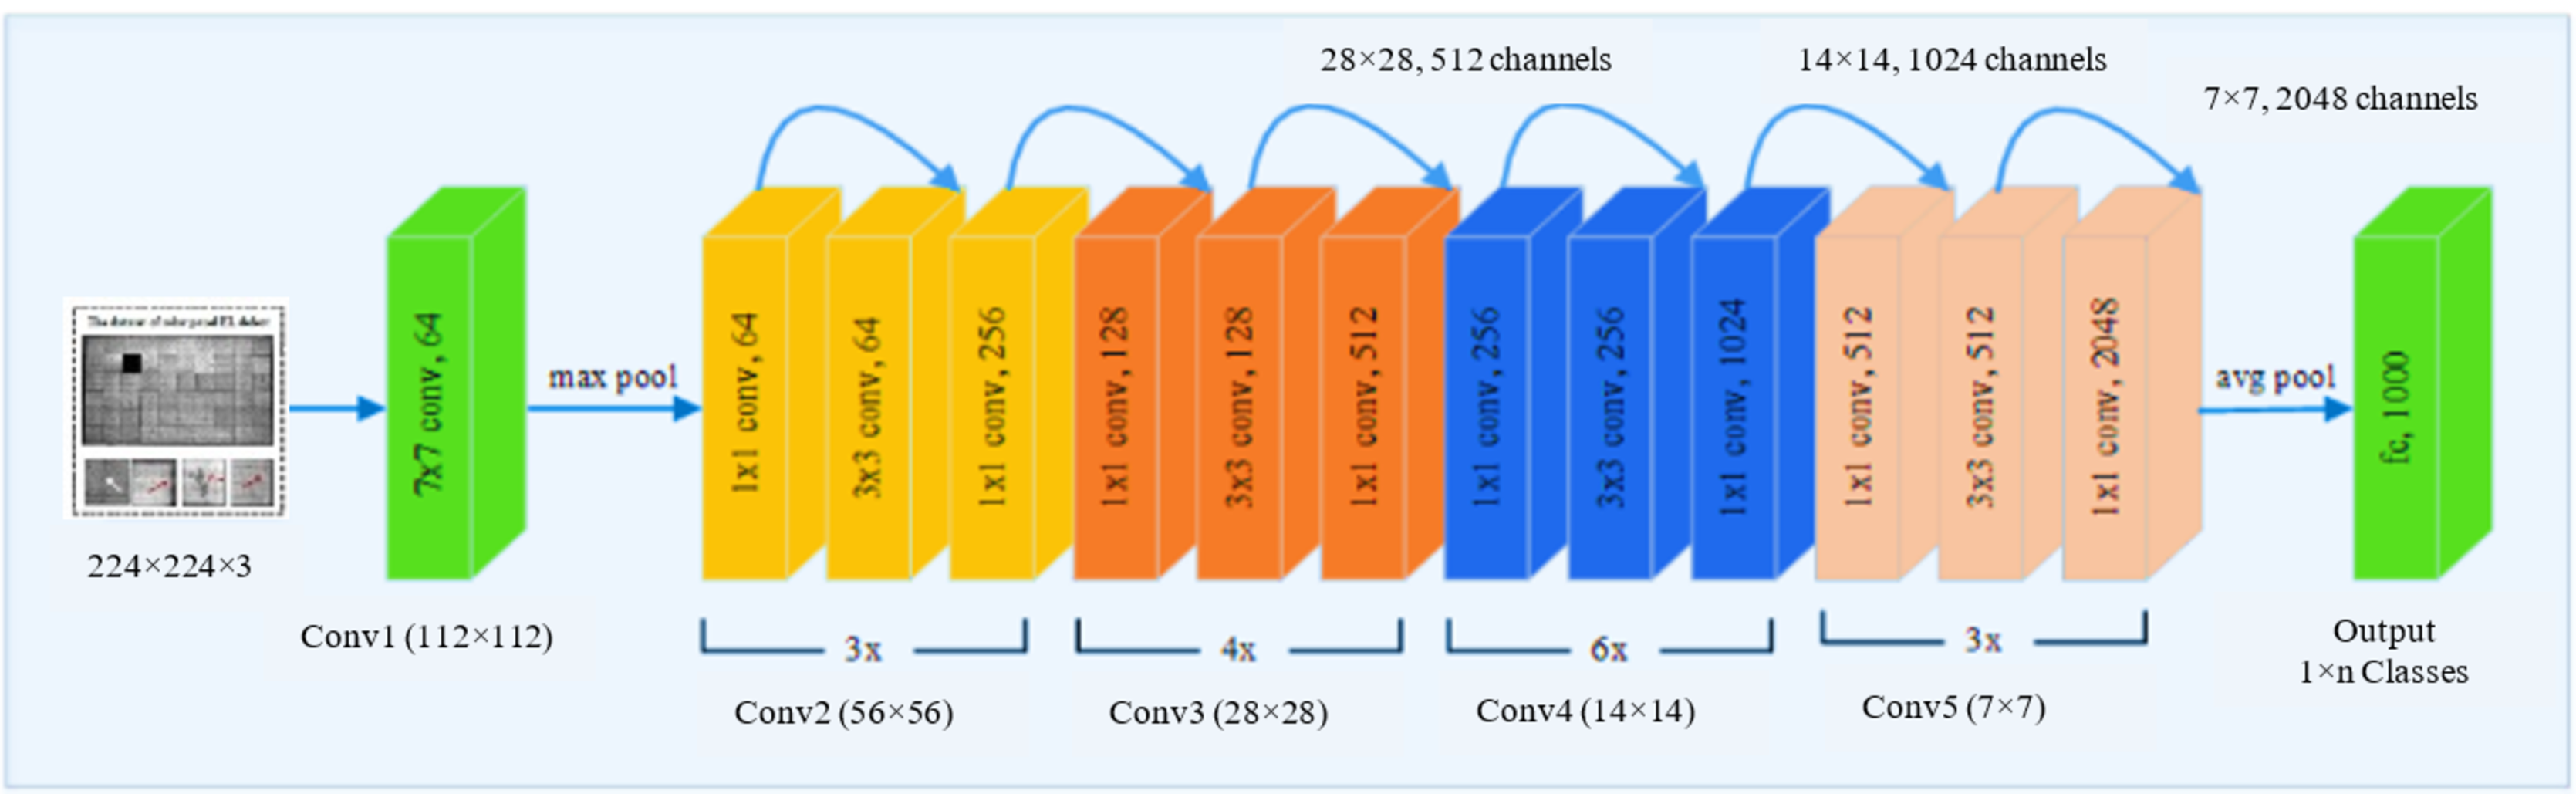

#### 1.5.1 Construct Archticture

In [23]:
# construct a sequential network using keras library
# apply ResNet 50 Archticture

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),

    # Residual block
    tf.keras.layers.Conv2D(64, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, kernel_size=(1, 1), strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),

    # Identity block
    tf.keras.layers.Conv2D(64, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, kernel_size=(1, 1), strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        3200      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 64)          4160      
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 256)         16640     
                                                                 
 batch_normalization_2 (Bat  (None, 7, 7, 256)         1024      
 chNormalization)                                     

#### 1.5.2 compile model - specify optimizers / loss and needed metrics

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### 1.5.3 Training phase

In [26]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 19s 8ms/step - loss: 0.2524 - accuracy: 0.9502 - val_loss: 0.1934 - val_accuracy: 0.9690
Epoch 2/5
844/844 [==============================] - 5s 6ms/step - loss: 0.1553 - accuracy: 0.9749 - val_loss: 0.1118 - val_accuracy: 0.9822
Epoch 3/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0975 - accuracy: 0.9820 - val_loss: 0.1559 - val_accuracy: 0.9733
Epoch 4/5
844/844 [==============================] - 5s 6ms/step - loss: 0.0638 - accuracy: 0.9860 - val_loss: 0.0634 - val_accuracy: 0.9858
Epoch 5/5
844/844 [==============================] - 5s 6ms/step - loss: 0.0494 - accuracy: 0.9875 - val_loss: 0.0514 - val_accuracy: 0.9872


#### 1.5.4 Accuracy metric and summary

In [27]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0371 - accuracy: 0.9888
Training Accuracy: 98.88%


In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0540 - accuracy: 0.9858
Testing Accuracy: 98.58%


### 1.6. VGG 16 Archticture

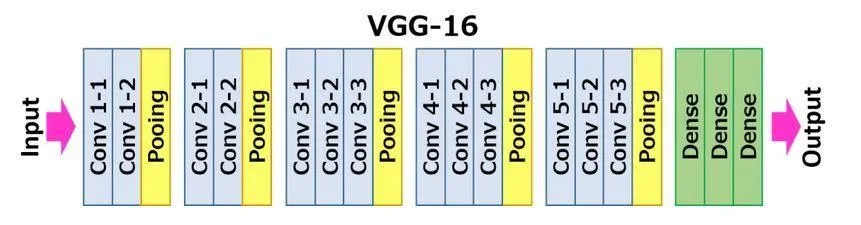

#### 1.6.1 Construct Archticture

In [29]:
# construct a sequential network using keras library
# apply VGG 16 Archticture

# NOTE : need to preprocess image to 28x28 -> 32x32 or what ?
# what's better to do so or to trunc archticture itself ( i.e remove one or moreblocks )
# Trace built-in VGG 16, how it works

"""
Traning notes
------------------------
using padding into 32x32, accuracy doesn't go over 12%
while removing last block of conv layers ( second 512's ), it allows 28x28 input and also gives reasonablly high accuracy

"""

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    # tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    # tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    # tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # remove this block
    # tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    # tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    # tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    # tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                 

#### 1.6.2 compile model - specify optimizers / loss and needed metrics

In [31]:
# tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### 1.6.3 Training phase

In [32]:
# preprocess input from 28x28 -> 32x32
x_train.shape

(60000, 28, 28)

In [33]:
x_train_padded = np.pad(x_train, pad_width=((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)

In [34]:
x_train_padded.shape

(60000, 32, 32)

In [35]:
# model.fit(x_train_padded, y_train, epochs=5, batch_size=256, validation_split=0.1)
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 26s 27ms/step - loss: 0.2176 - accuracy: 0.9301 - val_loss: 0.0559 - val_accuracy: 0.9830
Epoch 2/5
844/844 [==============================] - 20s 23ms/step - loss: 0.0608 - accuracy: 0.9826 - val_loss: 0.0397 - val_accuracy: 0.9885
Epoch 3/5
844/844 [==============================] - 19s 23ms/step - loss: 0.0485 - accuracy: 0.9866 - val_loss: 0.0326 - val_accuracy: 0.9920
Epoch 4/5
844/844 [==============================] - 19s 23ms/step - loss: 0.0408 - accuracy: 0.9890 - val_loss: 0.0316 - val_accuracy: 0.9917
Epoch 5/5
844/844 [==============================] - 19s 23ms/step - loss: 0.0332 - accuracy: 0.9908 - val_loss: 0.0370 - val_accuracy: 0.9907


#### 1.6.4 Accuracy metric and summary

In [36]:
# train_loss, train_accuracy = model.evaluate(x_train_padded, y_train)
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0248 - accuracy: 0.9923
Training Accuracy: 99.23%


In [37]:
# padding the test data 28x28 -> 32x32
x_test_padded = np.pad(x_test, pad_width=((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)

In [38]:
# test_loss, test_accuracy = model.evaluate(x_test_padded, y_test)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.0343 - accuracy: 0.9898
Testing Accuracy: 98.98%


### 1.7. ResNet 50 ( Pretrained )

In [39]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [40]:
input_layer = tf.keras.Input(shape=(32, 32, 3))

In [41]:
model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_layer)

94765736/94765736 [==============================] - 0s 0us/step


In [42]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [43]:
# add flatten , denese and custom output layers

previous_layer = model.output
flatten = tf.keras.layers.Flatten()(previous_layer)
output_layer = tf.keras.layers.Dense(10,activation='softmax')(flatten)

model = tf.keras.models.Model(inputs=model.input, outputs=output_layer)

In [44]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [45]:
# tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
x_train.shape

(60000, 28, 28)

In [47]:
# preprocess input from 28x28 -> 32x32
x_train_padded = np.pad(x_train, pad_width=((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)

In [48]:
x_train_padded.shape

(60000, 32, 32)

In [49]:
# preprocess input from 32x32x1 ( single channel input ) -> 32x32x3 ( 3 Channel input )
X_train_padded_rgb = np.repeat(x_train_padded[..., np.newaxis], 3, -1)

In [50]:
X_train_padded_rgb.shape

(60000, 32, 32, 3)

In [51]:
# model.fit(x_train, y_train, epochs=5, batch_size=256, validation_split=0.1)
model.fit(X_train_padded_rgb, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 80s 54ms/step - loss: 0.1776 - accuracy: 0.9568 - val_loss: 0.1208 - val_accuracy: 0.9705
Epoch 2/5
844/844 [==============================] - 43s 52ms/step - loss: 0.1391 - accuracy: 0.9689 - val_loss: 0.0520 - val_accuracy: 0.9852
Epoch 3/5
844/844 [==============================] - 43s 51ms/step - loss: 0.1507 - accuracy: 0.9662 - val_loss: 0.0607 - val_accuracy: 0.9818
Epoch 4/5
844/844 [==============================] - 42s 50ms/step - loss: 0.1182 - accuracy: 0.9765 - val_loss: 0.0343 - val_accuracy: 0.9892
Epoch 5/5
844/844 [==============================] - 43s 51ms/step - loss: 0.0466 - accuracy: 0.9870 - val_loss: 0.0310 - val_accuracy: 0.9907


In [52]:
# train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_loss, train_accuracy = model.evaluate(X_train_padded_rgb, y_train)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

1875/1875 [==============================] - 22s 12ms/step - loss: 0.0265 - accuracy: 0.9919
Training Accuracy: 99.19%


In [53]:
# padding the test data 28x28 -> 32x32
x_test_padded = np.pad(x_test, pad_width=((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)

In [54]:
# preprocess input from 32x32x1 ( single channel input ) -> 32x32x3 ( 3 Channel input )
X_test_padded_rgb = np.repeat(x_test_padded[..., np.newaxis], 3, -1)

In [55]:
# test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test_padded_rgb, y_test)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 4s 12ms/step - loss: 0.0346 - accuracy: 0.9889
Testing Accuracy: 98.89%


### 1.8. VGG 16 ( Pretrained )

In [56]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [57]:
input_layer = tf.keras.Input(shape=(32, 32, 3))

In [58]:
model = VGG16(weights='imagenet', include_top=False, input_tensor=input_layer)

58889256/58889256 [==============================] - 0s 0us/step


In [59]:
model.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x7ae1cc47f7c0>>

In [60]:
# add flatten , denese and custom output layers

previous_layer = model.output
flatten = tf.keras.layers.Flatten()(previous_layer)
dense1 = tf.keras.layers.Dense(4096,activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(4096,activation='relu')(dense1)

output_layer = tf.keras.layers.Dense(10,activation='softmax')(dense2)

model = tf.keras.models.Model(inputs=model.input, outputs=output_layer)

In [61]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [62]:
# tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [63]:
x_train.shape

(60000, 28, 28)

In [64]:
# preprocess input from 28x28 -> 32x32
x_train_padded = np.pad(x_train, pad_width=((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)

In [65]:
x_train_padded.shape

(60000, 32, 32)

In [66]:
# preprocess input from 32x32x1 ( single channel input ) -> 32x32x3 ( 3 Channel input )
X_train_padded_rgb = np.repeat(x_train_padded[..., np.newaxis], 3, -1)

In [67]:
X_train_padded_rgb.shape

(60000, 32, 32, 3)

In [68]:
# model.fit(x_train, y_train, epochs=5, batch_size=256, validation_split=0.1)
model.fit(X_train_padded_rgb, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 43s 44ms/step - loss: 2.3097 - accuracy: 0.1121 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 2/5
844/844 [==============================] - 35s 42ms/step - loss: 2.3014 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 3/5
844/844 [==============================] - 35s 42ms/step - loss: 2.3014 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 4/5
844/844 [==============================] - 35s 42ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 5/5
844/844 [==============================] - 35s 42ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050


In [69]:
# train_loss, train_accuracy = model.evaluate(x_train, y_train)
train_loss, train_accuracy = model.evaluate(X_train_padded_rgb, y_train)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

1875/1875 [==============================] - 17s 9ms/step - loss: 2.3012 - accuracy: 0.1124
Training Accuracy: 11.24%


In [70]:
# padding the test data 28x28 -> 32x32
x_test_padded = np.pad(x_test, pad_width=((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)

In [71]:
# preprocess input from 32x32x1 ( single channel input ) -> 32x32x3 ( 3 Channel input )
X_test_padded_rgb = np.repeat(x_test_padded[..., np.newaxis], 3, -1)

In [72]:
# test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test_padded_rgb, y_test)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 3s 10ms/step - loss: 2.3010 - accuracy: 0.1135
Testing Accuracy: 11.35%


# 2. CIFAR-10 Dataset


### 1.1. Imports


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 1.2. Loading dataset


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
len(x_train)

50000

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### 1.3. Visualize data samples


In [7]:
# Pick 10 Random samples to visualize
random_indices = np.random.randint(0, len(x_train), size=30)

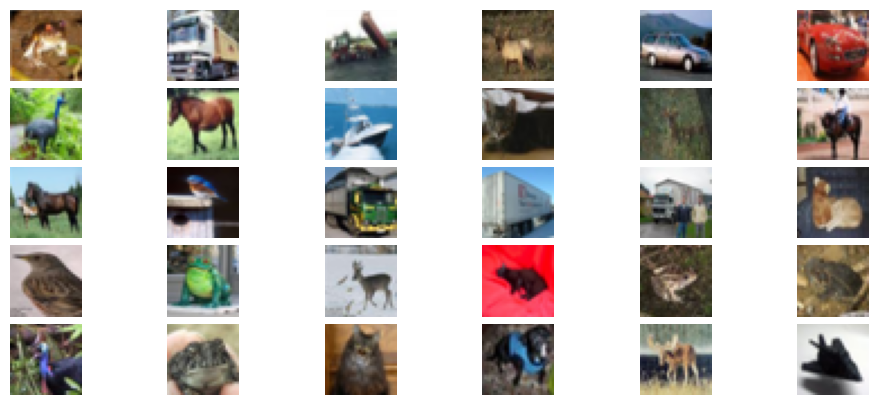

In [8]:
num_rows = 5
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5))

for i in range(num_rows):
    for j in range(num_cols):
        axes[i, j].imshow(x_train[i * num_cols + j], cmap='gray')
        axes[i, j].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

### 1.4. Preprocessing datasets

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### 1.5. ResNet 50 Archticture

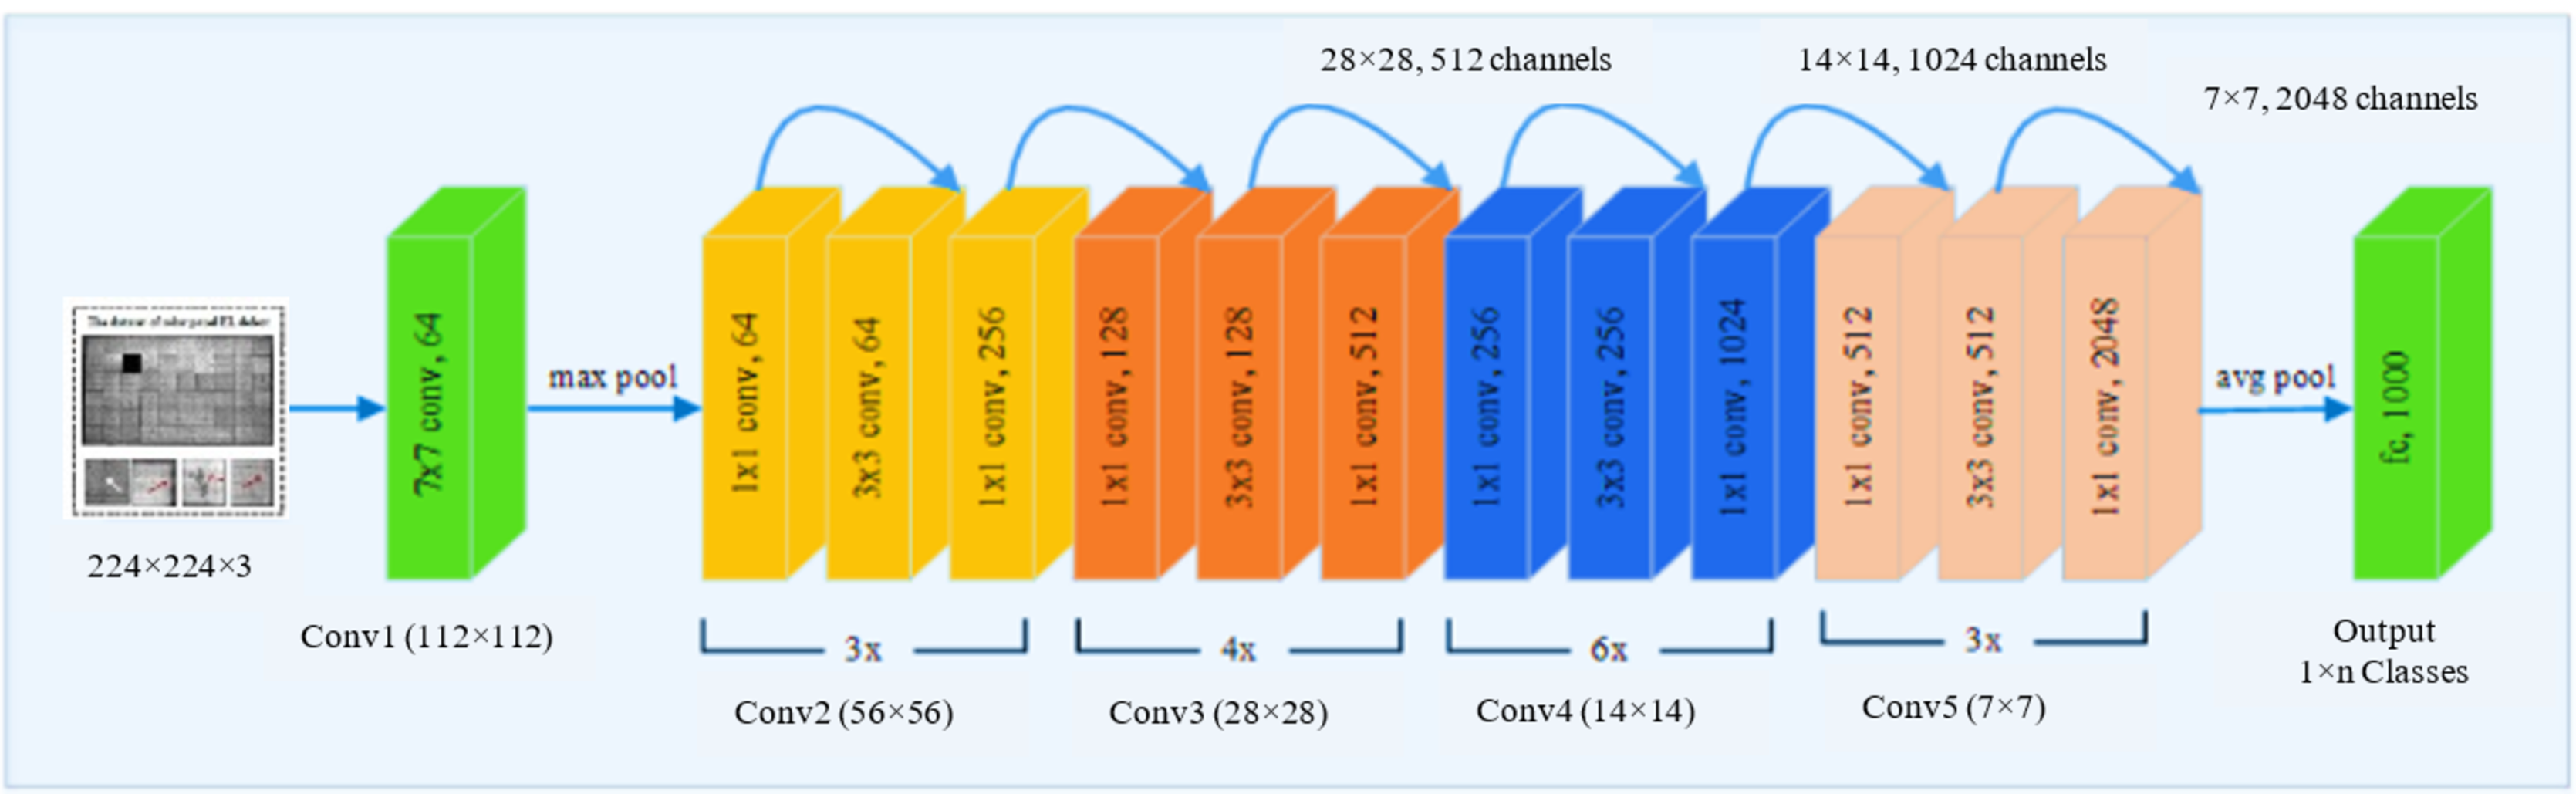

#### 1.5.1 Construct Archticture

In [10]:
# construct a sequential network using keras library
# apply ResNet 50 Archticture

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=(32, 32, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),

    # Residual block
    tf.keras.layers.Conv2D(64, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, kernel_size=(1, 1), strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),

    # Identity block
    tf.keras.layers.Conv2D(64, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, kernel_size=(1, 1), strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          4160      
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         16640     
                                                                 
 batch_normalization (Batch  (None, 8, 8, 256)         1024      
 Normalization)                                         

#### 1.5.2 compile model - specify optimizers / loss and needed metrics

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### 1.5.3 Training phase

In [13]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 18s 8ms/step - loss: 2.6207 - accuracy: 0.3576 - val_loss: 2.4072 - val_accuracy: 0.2304
Epoch 2/5
704/704 [==============================] - 5s 7ms/step - loss: 1.9079 - accuracy: 0.4626 - val_loss: 2.1289 - val_accuracy: 0.3634
Epoch 3/5
704/704 [==============================] - 4s 6ms/step - loss: 1.3387 - accuracy: 0.5637 - val_loss: 1.3136 - val_accuracy: 0.5614
Epoch 4/5
704/704 [==============================] - 4s 6ms/step - loss: 1.0713 - accuracy: 0.6299 - val_loss: 1.1040 - val_accuracy: 0.6178
Epoch 5/5
704/704 [==============================] - 5s 7ms/step - loss: 0.9412 - accuracy: 0.6726 - val_loss: 1.0959 - val_accuracy: 0.6242


#### 1.5.4 Accuracy metric and summary

In [14]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

1563/1563 [==============================] - 5s 3ms/step - loss: 0.9654 - accuracy: 0.6605
Training Accuracy: 66.05%


In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 1.1586 - accuracy: 0.6065
Testing Accuracy: 60.65%


### 1.6. VGG 16 Archticture

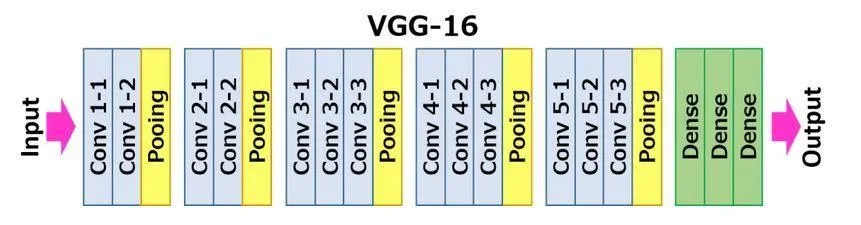

#### 1.6.1 Construct Archticture

In [16]:
# construct a sequential network using keras library
# apply VGG 16 Archticture

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),


    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

#### 1.6.2 compile model - specify optimizers / loss and needed metrics

In [18]:
# tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### 1.6.3 Training phase

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 42s 48ms/step - loss: 2.3029 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0958
Epoch 2/5
704/704 [==============================] - 35s 50ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 3/5
704/704 [==============================] - 34s 49ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 4/5
704/704 [==============================] - 30s 43ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 5/5
704/704 [==============================] - 30s 43ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3029 - val_accuracy: 0.0950


#### 1.6.4 Accuracy metric and summary

In [21]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

1563/1563 [==============================] - 14s 9ms/step - loss: 2.3026 - accuracy: 0.1000
Training Accuracy: 10.00%


In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 3s 9ms/step - loss: 2.3026 - accuracy: 0.1000
Testing Accuracy: 10.00%


### 1.7. ResNet 50 ( Pretrained )

In [23]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [24]:
input_layer = tf.keras.Input(shape=(32, 32, 3))

In [25]:
model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_layer)

In [26]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [27]:
# add flatten , denese and custom output layers

previous_layer = model.output
flatten = tf.keras.layers.Flatten()(previous_layer)
output_layer = tf.keras.layers.Dense(10,activation='softmax')(flatten)

model = tf.keras.models.Model(inputs=model.input, outputs=output_layer)

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [29]:
# tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
x_train.shape

(50000, 32, 32, 3)

In [31]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 72s 54ms/step - loss: 1.3904 - accuracy: 0.5617 - val_loss: 3.0152 - val_accuracy: 0.1384
Epoch 2/5
704/704 [==============================] - 36s 51ms/step - loss: 1.2514 - accuracy: 0.6100 - val_loss: 0.9344 - val_accuracy: 0.6738
Epoch 3/5
704/704 [==============================] - 36s 51ms/step - loss: 1.1522 - accuracy: 0.6437 - val_loss: 1.3533 - val_accuracy: 0.5306
Epoch 4/5
704/704 [==============================] - 36s 51ms/step - loss: 1.4887 - accuracy: 0.5601 - val_loss: 12.6932 - val_accuracy: 0.3696
Epoch 5/5
704/704 [==============================] - 36s 51ms/step - loss: 1.1291 - accuracy: 0.6348 - val_loss: 0.8830 - val_accuracy: 0.6874


In [32]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

1563/1563 [==============================] - 19s 12ms/step - loss: 0.8422 - accuracy: 0.7022
Training Accuracy: 70.22%


In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 4s 11ms/step - loss: 0.9268 - accuracy: 0.6774
Testing Accuracy: 67.74%


### 1.8. VGG 16 ( Pretrained )

In [34]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [35]:
input_layer = tf.keras.Input(shape=(32, 32, 3))

In [36]:
model = VGG16(weights='imagenet', include_top=False, input_tensor=input_layer)

In [37]:
model.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x7e0f5bcb7850>>

In [38]:
# add flatten , denese and custom output layers

previous_layer = model.output
flatten = tf.keras.layers.Flatten()(previous_layer)
dense1 = tf.keras.layers.Dense(4096,activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(4096,activation='relu')(dense1)

output_layer = tf.keras.layers.Dense(10,activation='softmax')(dense2)

model = tf.keras.models.Model(inputs=model.input, outputs=output_layer)

In [39]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [40]:
# tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
x_train.shape

(50000, 32, 32, 3)

In [42]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 35s 43ms/step - loss: 2.3420 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.0970
Epoch 2/5
704/704 [==============================] - 31s 44ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3025 - val_accuracy: 0.1058
Epoch 3/5
704/704 [==============================] - 30s 43ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.1058
Epoch 4/5
704/704 [==============================] - 30s 43ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 5/5
704/704 [==============================] - 30s 42ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.0976


In [43]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

1563/1563 [==============================] - 14s 9ms/step - loss: 2.3026 - accuracy: 0.1000
Training Accuracy: 10.00%


In [44]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 3s 9ms/step - loss: 2.3026 - accuracy: 0.1000
Testing Accuracy: 10.00%
